## 데이터 가져오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 한글폰트 설정

In [12]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

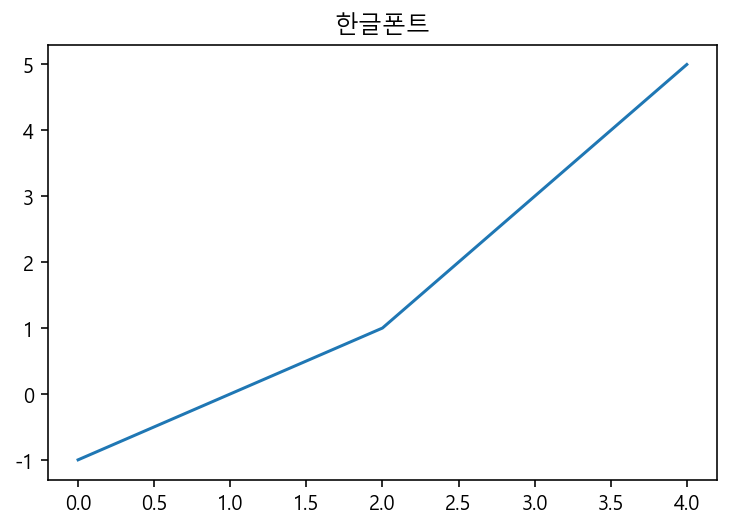

In [13]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
pd.Series([-1,0,1,3,5]).plot(title='한글폰트')

In [14]:
df=pd.read_csv('C:/Users/Max/Documents/상가업소정보_201912_01.csv',sep='|')
df.shape

(573680, 39)

### info보기

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

In [17]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

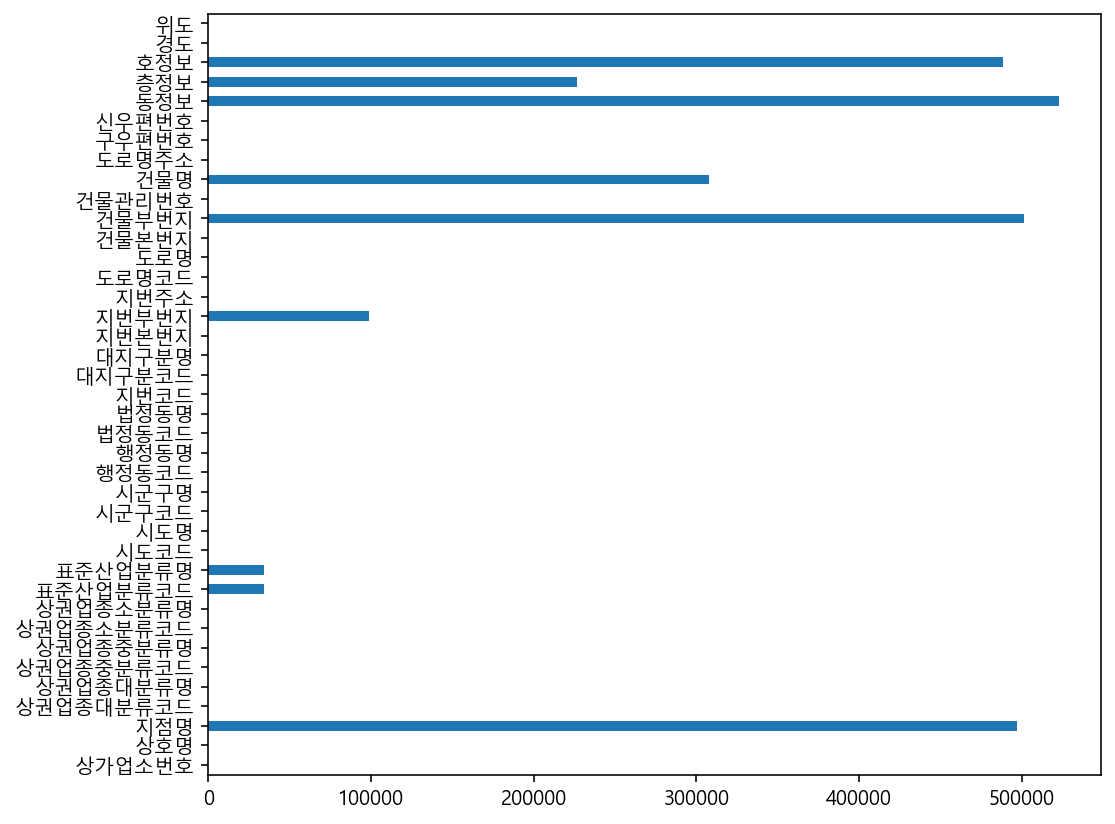

In [19]:
df.isnull().sum().plot.barh(figsize=(8,7))

### 사용하지 않는 칼럼 제거

In [21]:
columns=['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명'
        ,'시군구명','행정동명','법정동명','도로명주소','경도','위도']

df = df[columns].copy()

In [23]:
df.shape

(573680, 11)

## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [25]:
df_seoul = df[df['시도명']=='서울특별시'].copy()
df_seoul.shape

(407376, 11)

### 일부 텍스트가 들어가는 데이터만 가져오기

In [27]:
df_seoul['상호명_소문자']=df_seoul['상호명'].str.lower()

In [34]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'),'상호명_소문자']

1675       이디야커피
2957       이디야커피
8534       이디야커피
13913        이디아
14605      이디야커피
           ...  
557161     이디야커피
557163     이디야커피
557498     이디야커피
565196    이디아스포츠
568636     이디야커피
Name: 상호명_소문자, Length: 543, dtype: object

In [35]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'),'상호명_소문자']

1104                스타벅스
2023           스타벅스종로3가점
2770                스타벅스
14770     스타벅스커피여의도ifc1f
14781               스타벅스
               ...      
563387              스타벅스
567090              스타벅스
567828              스타벅스
570096              스타벅스
571052              스타벅스
Name: 상호명_소문자, Length: 506, dtype: object

In [38]:
df_cafe = df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [44]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'),'브랜드명'] = '스타벅스'

In [45]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('이디야|이디아|ediya'),'브랜드명'] = '이디야'

In [46]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
1104,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303,스타벅스,스타벅스
1675,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피,이디야
2023,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585,스타벅스종로3가점,스타벅스
2770,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663,스타벅스,스타벅스
2957,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,이디야커피,이디야
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567090,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,낙성대동,봉천동,서울특별시 관악구 관악로 158,126.952792,37.479298,스타벅스,스타벅스
567828,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호4가동,금호동4가,서울특별시 성동구 동호로 99,127.015329,37.548028,스타벅스,스타벅스
568636,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재1동,우면동,서울특별시 서초구 바우뫼로 20,127.025274,37.469980,이디야커피,이디야
570096,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서대문구,북아현동,북아현동,서울특별시 서대문구 북아현로 29,126.956144,37.560080,스타벅스,스타벅스


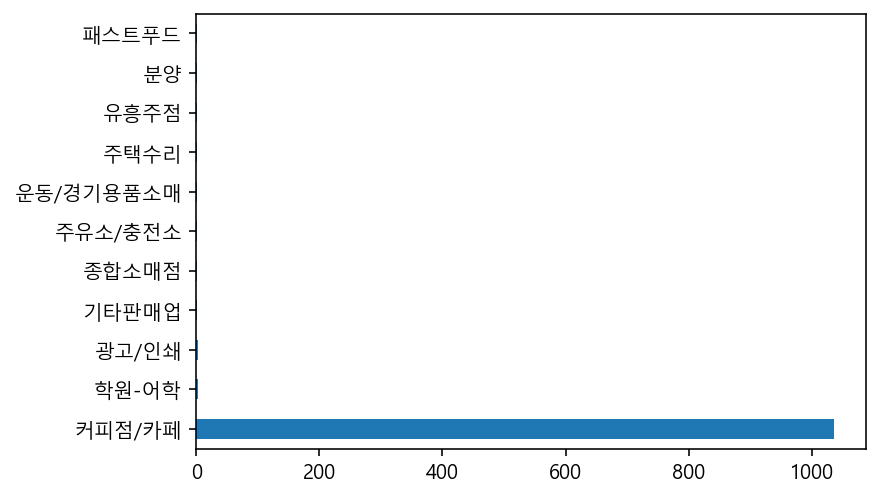

In [50]:
df_cafe['상권업종중분류명'].value_counts().plot.barh()

In [51]:
print(df_cafe.shape)
df_cafe=df_cafe[df_cafe['상권업종중분류명']=='커피점/카페'].copy()
df_cafe.shape

(1049, 13)


(1036, 13)

In [52]:
df_cafe['브랜드명'].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

### 시각화

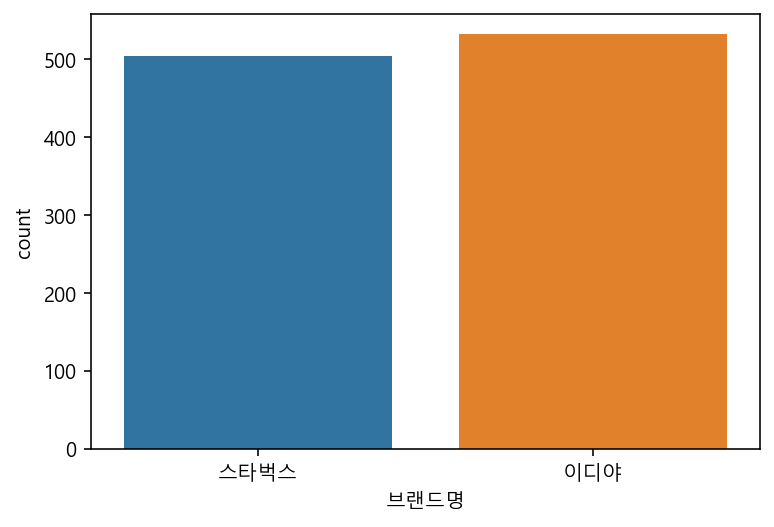

In [53]:
sns.countplot(data=df_cafe, x='브랜드명')

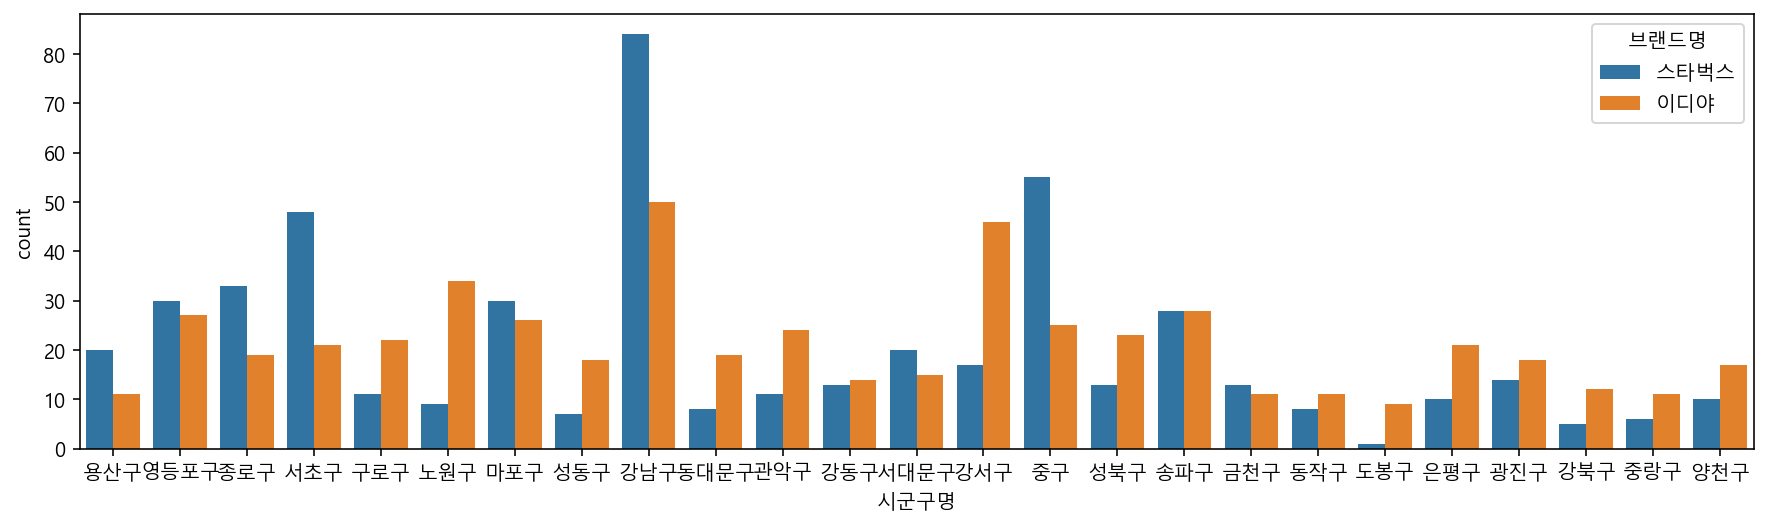

In [57]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x='시군구명',hue='브랜드명')

### scatterplot 그리기

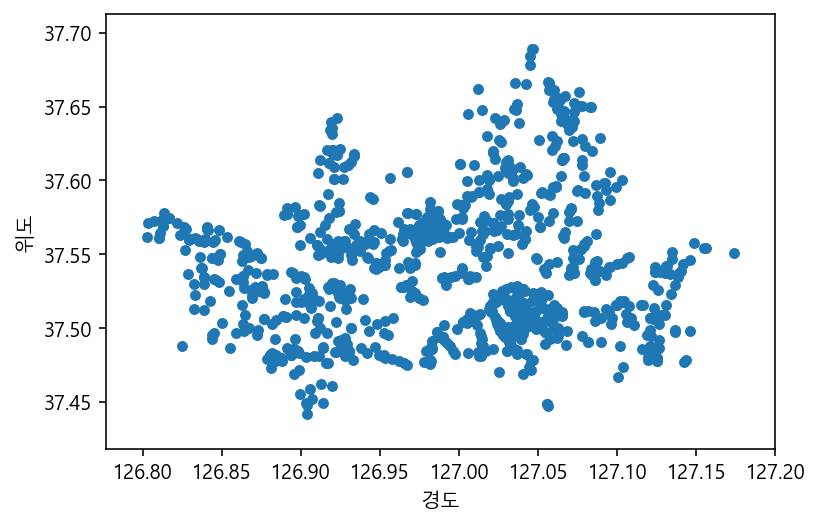

In [61]:
df_cafe[['위도','경도']].plot.scatter(x='경도',y='위도')

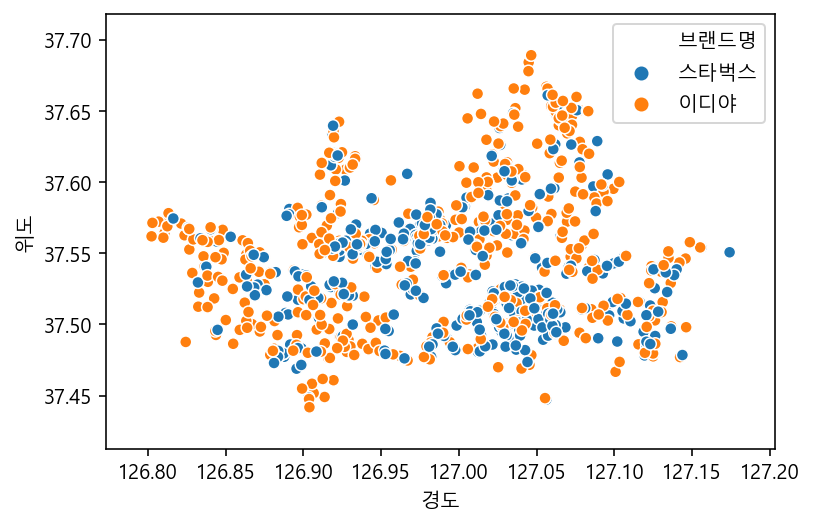

In [62]:
sns.scatterplot(data=df_cafe,x='경도',y='위도',hue='브랜드명')

### jointplot그리기

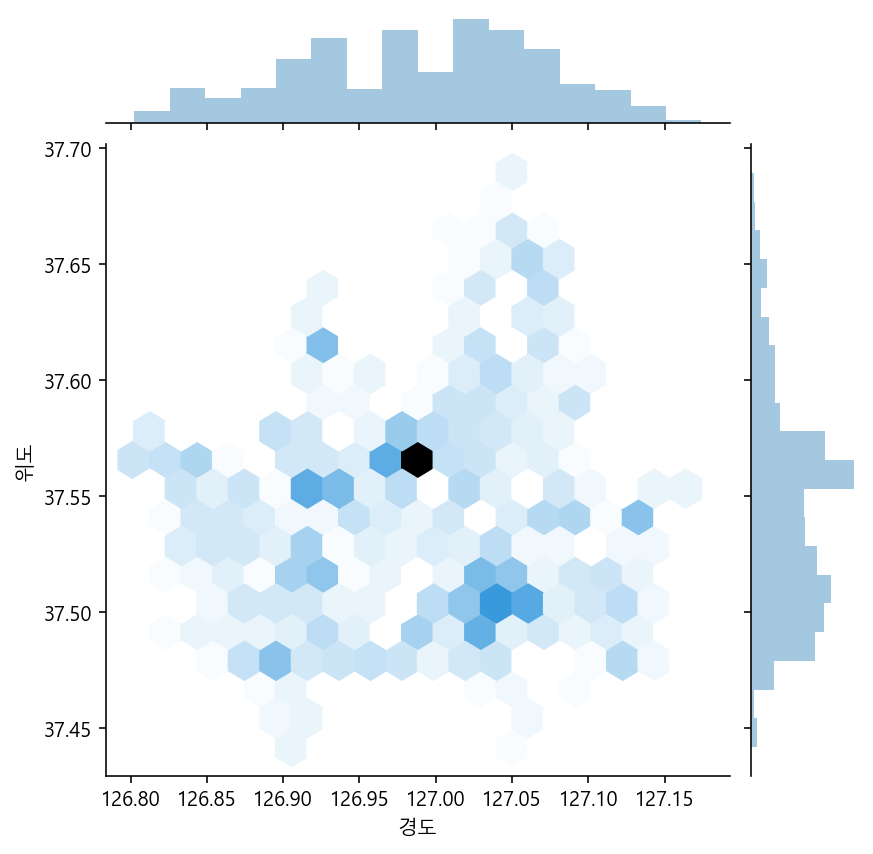

In [65]:
sns.jointplot(data=df_cafe, x='경도', y='위도', kind='hex')

## 구별 브랜드별 점포수

### groupby 와 pivot_table로 구별 스타벅스, 이디야 매장 수 구하기



In [67]:
df_cafe.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
1104,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303,스타벅스,스타벅스
1675,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피,이디야
2023,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585,스타벅스종로3가점,스타벅스
2770,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663,스타벅스,스타벅스
2957,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,이디야커피,이디야


In [71]:
df_cafe_vs=df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count().copy()

In [72]:
df_cafe_vs.to_frame()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5
     이디야    12
강서구  스타벅스   17
     이디야    46
관악구  스타벅스   11
     이디야    24
광진구  스타벅스   14
     이디야    18
구로구  스타벅스   11
     이디야    22
금천구  스타벅스   13
     이디야    11
노원구  스타벅스    9
     이디야    34
도봉구  스타벅스    1
     이디야     9
동대문구 스타벅스    8
     이디야    19
동작구  스타벅스    8
     이디야    11
마포구  스타벅스   30
     이디야    26
서대문구 스타벅스   20
     이디야    15
서초구  스타벅스   48
     이디야    21
성동구  스타벅스    7
     이디야    18
성북구  스타벅스   13
     이디야    23
송파구  스타벅스   28
     이디야    28
양천구  스타벅스   10
     이디야    17
영등포구 스타벅스   30
     이디야    27
용산구  스타벅스   20
     이디야    11
은평구  스타벅스   10
     이디야    21
종로구  스타벅스   33
     이디야    19
중구   스타벅스   55
     이디야    25
중랑구  스타벅스    6
     이디야    11

In [75]:
df_cafe_vs=df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [76]:
df_cafe_vs.columns=['구','브랜드명','매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [81]:
pivot = pd.pivot_table(data=df_cafe, index=['시군구명','브랜드명'], values='상호명',aggfunc='count')
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [82]:
pivot.loc['강남구']

,상호명
브랜드명,
스타벅스,84
이디야,50
